<a href="https://colab.research.google.com/github/anitaannah/iris_dataset/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP MAY'21**

## **Author : Anita Tomy**

**TASK 2: Prediction using Unsupervised ML**

### From the given iris dataset, predict the optimum number of clusters and represent it visually. The iris dataset consists of 4 features (sepal length and width, petal length and width) and 3 species of iris (setosa, versicolor and virginica)

**We will use K-Means Clustering Algorithm for this task**.

**Importing the libraries**






In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Loading the given dataset**

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data

**Converting the dataset into rows and columns**

In [7]:
iris = pd.DataFrame(dataset.data, columns = dataset.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#total number of rows and columns
iris.shape

(150, 4)

In [9]:
# checking for null values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
x=iris_data.data 
y=iris_data.target


**Data Visualization**

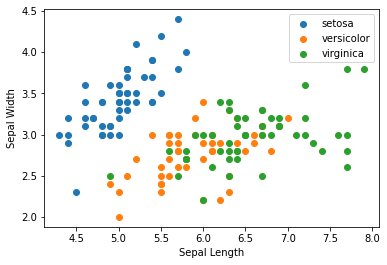

In [13]:
#between sepal length and width
plt.scatter(x[y == 0, 0], x[y == 0, 1], label = 'setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], label = 'versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1], label = 'virginica')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

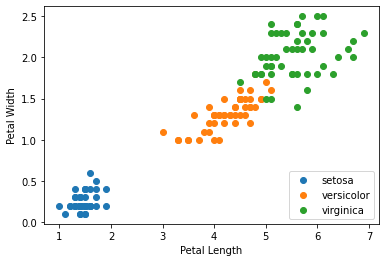

In [14]:
#between petal length and width
plt.scatter(x[y == 0, 2], x[y == 0, 3], label = 'setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3], label = 'versicolor')
plt.scatter(x[y == 2, 2], x[y == 2, 3], label = 'virginica')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

**Interpretation** : We can conclude that petal length and petal width are the better predictors since setosa is clearly seperable in the latter case.


## **To find the optimum number of clusters using k-Means Algorithm**

In [15]:
from sklearn.cluster import KMeans

In [17]:
# Experimenting with some values of 'K' to deduce the optimal value

wcv = [] # within cluster variation which helps to find the optimum no of clusters

for i in range(1, 16):
    km = KMeans(n_clusters = i)
    km.fit(x)
    wcv.append(km.inertia_) # calculates wcv

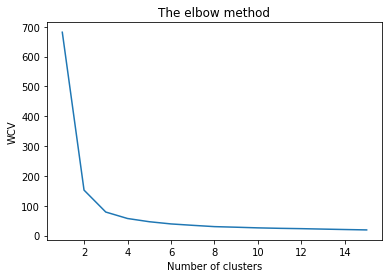

In [18]:
#  plotting a graph which shows the 'elbow' i.e. a point after the graph changes from exponential to linear
    
plt.plot(range(1, 16), wcv)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCV') # within cluster variation also known as within cluster sum of squares
plt.show()

**Interpretation** : From the graph , we can conclude that the elbow point is 3 which is the optimum number of clusters.

In [20]:
# Creating the kmeans classifier
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [21]:
iris['clusters']=y_pred
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**Visualizing the clusters of sepal length and width**

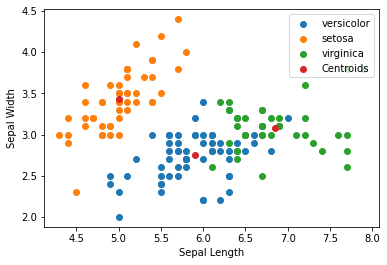

In [26]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], label = 'versicolor')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], label = 'setosa')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], label = 'virginica')

# Plotting the centroids.

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], label = 'Centroids')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


**Visualizing the clusters of petal length and width**

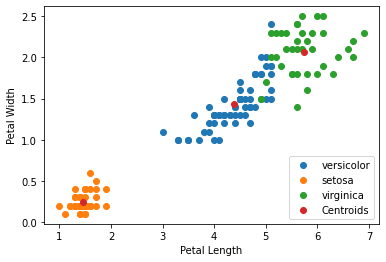

In [28]:
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], label = 'versicolor')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], label = 'setosa')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], label = 'virginica')

# Plotting the centroids. This time we're going to use the cluster centres 

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], label = 'Centroids')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

**Conclusion**:  The optimum number of clusters is predicted to be **3** and also we visualized them using scatter plot.

# **Thank you**